In [ ]:
# Import necessary libraries
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.17.0'

In [ ]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
# Label names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
# Dimensions of the training images and labels and also the test images and labels
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


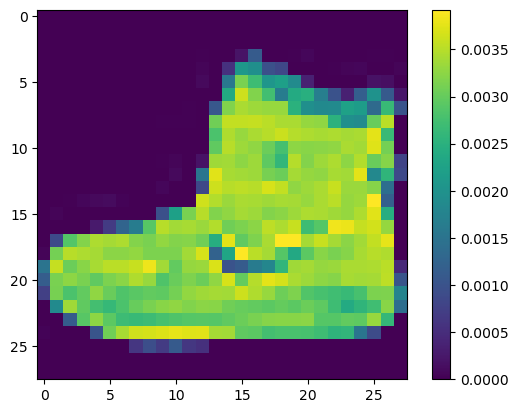

Ankle boot


In [21]:
# Sample image and label from the training set
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

print(class_names[train_labels[0]])

In [20]:
# Divide the pixel values by 255 to normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

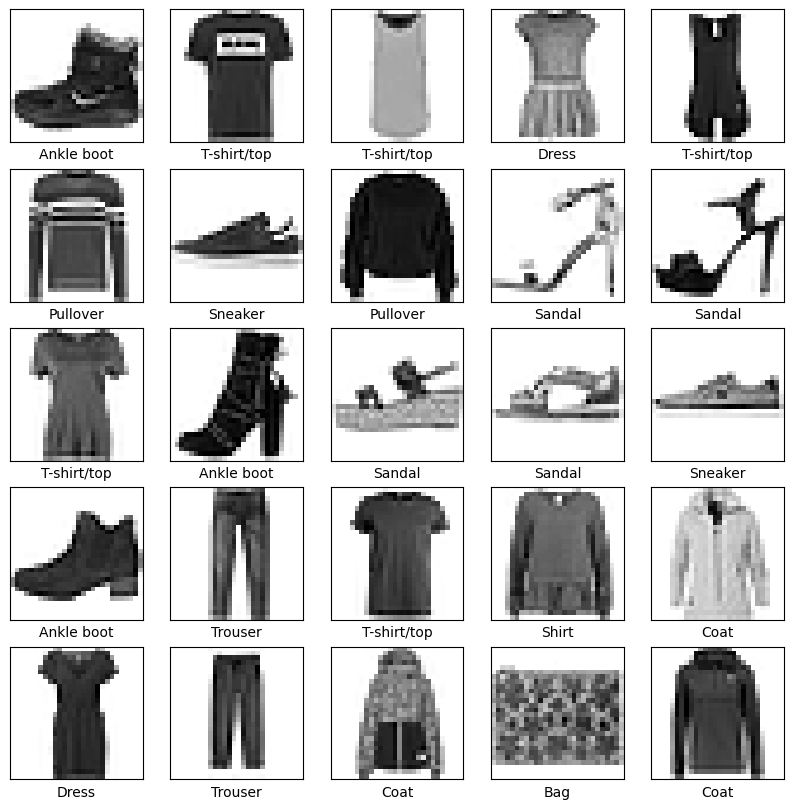

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [30]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [31]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
# Train the model
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.8493 - loss: 0.4292
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - accuracy: 0.8532 - loss: 0.4187
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8521 - loss: 0.4167
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step - accuracy: 0.8565 - loss: 0.4040
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.8584 - loss: 0.4052
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8597 - loss: 0.3975
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.8595 - loss: 0.3936
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.8632 - loss: 0.3924
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.8647 - loss: 0.3834
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.8661 - loss: 0.3810
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.8667 - loss: 0.3780
Epoch 12/20


In [39]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - 411us/step - accuracy: 0.8568 - loss: 0.3993


In [40]:
# Make predictions
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [47]:
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[1.2670598e-07 1.5792668e-09 2.5938859e-06 1.7721893e-06 1.8161561e-06
 1.1679252e-01 8.9738478e-06 8.7227166e-02 3.6611585e-03 7.9230392e-01]
9
9


In [49]:
# Graph fill set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

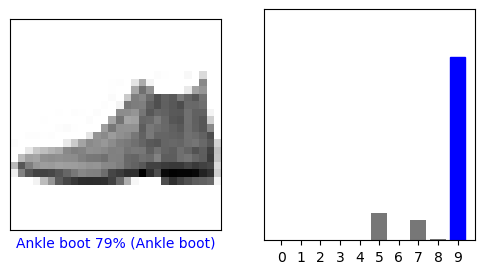

In [50]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

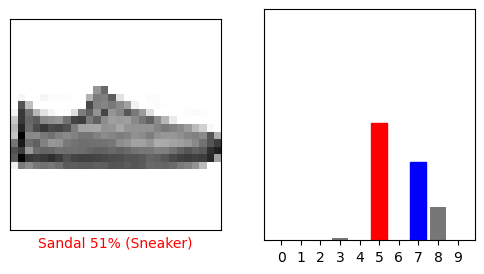

In [51]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

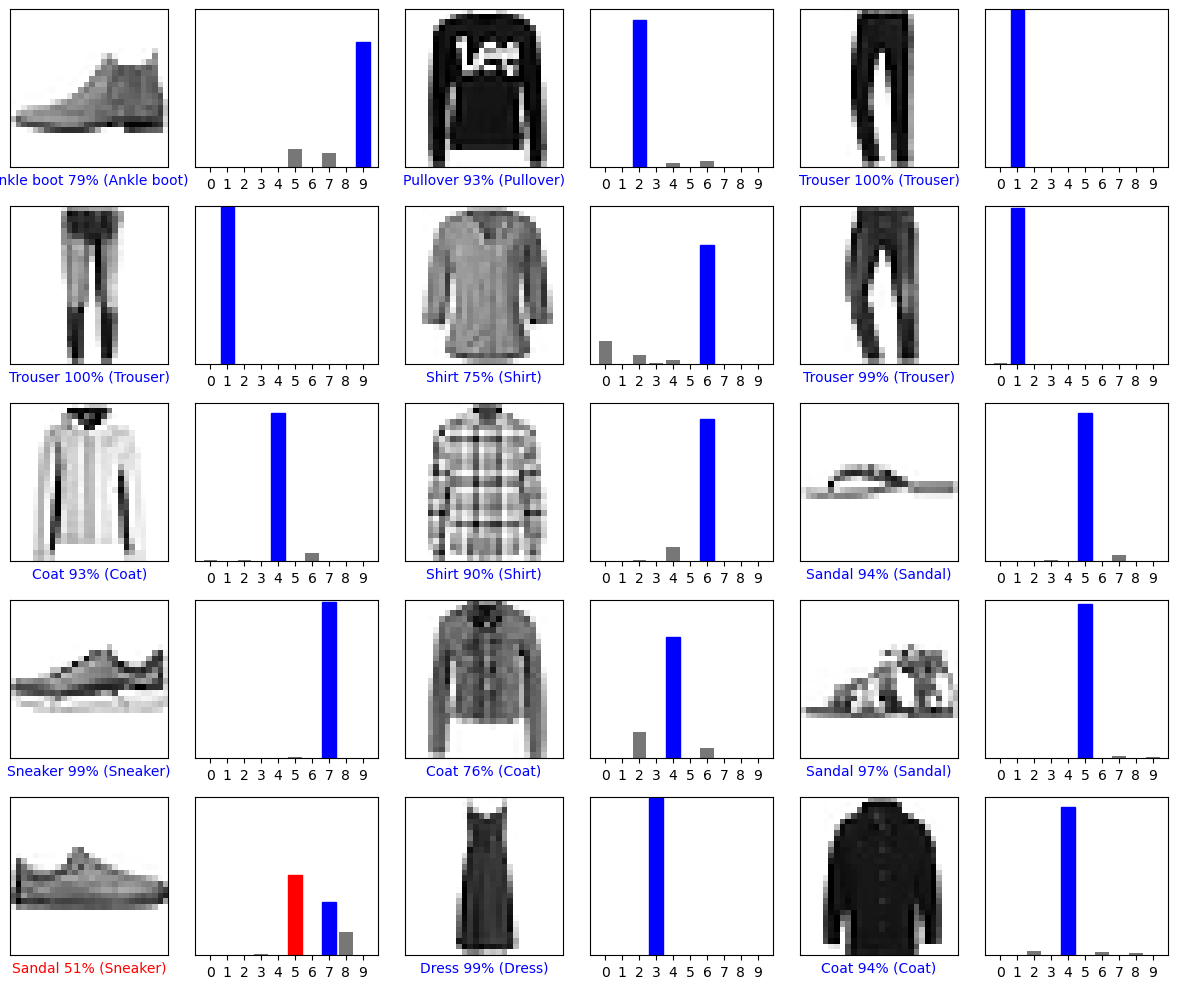

In [52]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [55]:
# Use the trained model
img = test_images[1]

print(img.shape)

(28, 28)


In [57]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [58]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[4.54469351e-04 1.08030008e-06 9.30803835e-01 1.35043119e-05
  2.58497931e-02 1.08482700e-12 4.27717566e-02 3.17513181e-20
  1.05483734e-04 1.14726417e-16]]


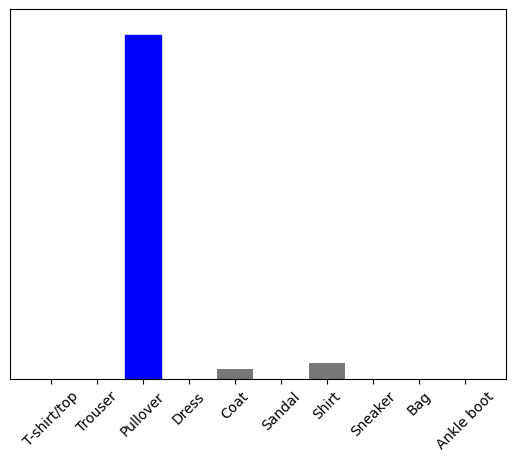

In [59]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()